## Why Not Directly Use Fully Connected Layers?

**1. High Dimensionality:**

- Images have a lot of pixels. For example, a grayscale image of size 28×28 has 784 pixels. Feeding this directly into a fully connected layer would require 784×128=100352 parameters for just the first layer. If you scale this up to color images the number of parameters grows exponentially, making the model computationally expensive and prone to overfitting.

**2.Loss of Spatial Information:**

- Fully connected layers treat each pixel as independent and ignore the spatial relationships between neighboring pixels.
For example, in a digit image, the relationship between the strokes forming the number "8" would be lost.

**3.Overfitting and Inefficiency:**

- Fully connected layers have a large number of parameters, leading to overfitting if the dataset isn’t massive.
They don’t efficiently focus on local patterns like edges, corners, or textures.

## Why Use Convolutional Layers?

**1. Extract Local Features**
- Convolutional layers apply filters (small matrices) to scan over local regions of the image. These filters can detect basic patterns like edges, corners, and textures.
- Multiple convolutional layers stack to learn complex patterns like shapes or object parts.

**2. Parameter Sharing**
- A convolutional filter is shared across the image, dramatically reducing the number of parameters compared to fully connected layers.
- For example, a 3x3 filter applied to an image has only 9 parameters, regardless of the image size.
  
**3. Translation Invariance**
- Convolutional layers help the network recognize features (like an edge) regardless of where they appear in the image.
- For example, a vertical line in the top-left corner or bottom-right corner is treated the same.

## Role of Each Layer

### 1.Convolutional Layers
- Learn and detect **local patterns** in the image, such as edges, corners, or textures.
- These are building blocks for understanding higher-level patterns like shapes, letters, or digits.

### 2.Pooling Layers
- Reduce the spatial size of feature maps while retaining important information.
- Makes the model computationally efficient and robust to small shifts or distortions in the image.

### 3.Fully Connected Layers
- Combine all the extracted features from the convolutional layers and map them to class probabilities.
- These act as the **final decision-making part** of the network.


## Key Advantages of Combining Convolutional Layers and Fully Connected Layers

**1.Hierarchical Feature Learning**
- Convolutional Layers: **Learn low-level features (edges, textures) and high-level features (shapes, objects) in a hierarchy.**
- Fully Connected Layers: **Use the high-level features for classification.**

**2.Efficiency**
- CNNs use far fewer parameters than fully connected networks while achieving better performance.

**3. Better Generalization**
- CNNs focus on patterns that are most relevant for the task, making them less prone to overfitting.

# Analogy
- Think of an image as a book:
  - **Convolutional Layers**: Read and understand sentences (local features).
  - **Pooling Layers**: Summarize each paragraph (reduce details while retaining important points).
  - **Fully Connected Layers**: Interpret the book's overall meaning and classify it.


In [19]:
# Import libraries
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

In [ ]:
# Define transform
transform = transforms.Compose([transforms.Resize((64,64)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Import datasets
train_datasets = datasets.ImageFolder(root='Fish-vs-Cats/train', transform=transform)

In [4]:
test_dataset = datasets.ImageFolder(root= 'Fish-vs-Cats/test', transform= transform)

In [5]:
val_dataset = datasets.ImageFolder(root = 'Fish-vs-Cats/val', transform=transform )

In [6]:
train_datasets

Dataset ImageFolder
    Number of datapoints: 800
    Root location: Fish-vs-Cats/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
train_datasets.targets[:10]   # To see target values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [29]:
train_datasets.targets[-10:-1]

[1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
train_datasets.class_to_idx # To see index for classes

{'cat': 0, 'fish': 1}

In [32]:
train_datasets.classes  # To see class names

['cat', 'fish']

- Training data has 800 input images.

In [7]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 160
    Root location: Fish-vs-Cats/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

- Test data has 160 inputs images.

In [8]:
val_dataset

Dataset ImageFolder
    Number of datapoints: 108
    Root location: Fish-vs-Cats/val
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

- Validation dataset has 108 input images.

In [ ]:
image, labels = train_datasets[0]

In [38]:
image.shape

torch.Size([3, 64, 64])

In [41]:
labels

0

- Each image is represented by a tensor with 3 channels each having 64x64 pixels.
- Labels are just one int number for each image.

In [42]:
# Create dataloader batches
train_loader = DataLoader(train_datasets, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

-**Shuffle** for various datasets:

1. Training DataLoader
Shuffle: True
Why:
Shuffling the training data ensures that the model does not learn any unintended patterns due to the order of the data. For example, if similar classes or similar features are grouped together, the model might overfit to these patterns.
Shuffling helps in better generalization and avoids bias from the dataset ordering.
It makes stochastic gradient descent (SGD) behave more robustly because the mini-batches contain a mix of examples from different parts of the dataset.

2. Validation DataLoader
Shuffle: False
Why:
Validation is used to evaluate the model's performance on unseen data after each epoch during training. The evaluation metrics should not depend on the data order, so shuffling is unnecessary.
Keeping the data order consistent ensures that the evaluation is deterministic, making it easier to compare results across different epochs or model runs.

3. Test DataLoader
Shuffle: False
Why:
Testing is performed after training is complete to evaluate the final performance of the model. Similar to validation, you want consistent and reproducible results.
Shuffling is not needed since the focus is on measuring how well the model generalizes to unseen data, not improving or altering the data distribution.

- Before starting with CNN model let's understand the basics.

**The Basics of a CNN**
A Convolutional Neural Network (CNN) typically consists of two main parts:

1. Feature Extraction: This is done using convolutional layers, ReLU activation, and pooling layers. These extract spatial features from the input image.
2. Classification: Fully connected (linear) layers at the end classify the extracted features into desired output classes.




In [ ]:
class CNNNet(nn.Module):  # nn.Module is base class for all Pytorch models.

    def __init__(self, num_classes=2):
        super(CNNNet, self).__init__()  # To initialize all the layers of the model.
                                        # Also allows to use all the functions like train, eval etc from nn.Module
        self.features = nn.Sequential(  # To learn spatial features (edges textures etc.)
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2), # 3 channels, 64 filters 
                                                                   # Extracts basic features
            nn.ReLU(),  # Introduces non-linearity to help the network learn complex patterns
                        # Makes negative values zero and positive values unchanged.
            nn.MaxPool2d(kernel_size=3, stride=2),  # Downsamples the image by taking the maximum value in each 3x3 region.
                                                    # Reduces image size, making the computation more efficient.
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6,6))  # Ensures feature map size after the convolution layers is always 6x6 regardless of the input image size.
                                                    # Makes the network more flexible to handle different input dimensions
        self.classifier = nn.Sequential(   # Flattens the feature map and applies fully connected layers to classify the image.
            nn.Dropout(),  # Randomly drops out some neurons during training to prevent overfitting, defaul is 50%.
            nn.Linear(256*6*6, 4096), # 256*6*6 = flattened feature map from the previous layers
                                      # Learns a mapping from the extracted features to a high-dimensional representation.
            nn.ReLU(),  # Adds non-linearity and enabling the network to learn complex functions.
            nn.Dropout(),  # Refine further
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, num_classes) # Outputs the raw scores (logits) for each class.
        )

    def forward(self, x): 
        x = self.features(x)  # Pass input through feature extraction layers.
        x = self.avgpool(x)   # Ensures a fixed-size output before the fc layers in classifier.
        x = torch.flatten(x, 1)  # Flattens input before fc layers.
        x = self.classifier(x)  # Maps extracted features to class probabilities.
        return x

In [13]:
import torch.optim as optim
import torch.nn as nn

# Initialize the model, loss function, and optimizer
model = CNNNet(num_classes=2)  # Binary classification (fish vs. cat)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [43]:
num_epochs = 20  # Define number of epochs

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0  # Initialize cumulative loss for each epoch
    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients from previous step
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass to compute gradients for the loss
        optimizer.step()  # Update weights

        running_loss += loss.item()   # Update loss for current batch.

    avg_loss = running_loss / len(train_loader)  # Average loss across all batches.
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')  # Display progress


Epoch [1/20], Loss: 0.1011
Epoch [2/20], Loss: 0.0497
Epoch [3/20], Loss: 0.0269
Epoch [4/20], Loss: 0.0675
Epoch [5/20], Loss: 0.0251
Epoch [6/20], Loss: 0.1195
Epoch [7/20], Loss: 0.1013
Epoch [8/20], Loss: 0.2235
Epoch [9/20], Loss: 0.0694
Epoch [10/20], Loss: 0.0917
Epoch [11/20], Loss: 0.0543
Epoch [12/20], Loss: 0.1577
Epoch [13/20], Loss: 0.1186
Epoch [14/20], Loss: 0.0237
Epoch [15/20], Loss: 0.0044
Epoch [16/20], Loss: 0.2295
Epoch [17/20], Loss: 0.2518
Epoch [18/20], Loss: 0.1231
Epoch [19/20], Loss: 0.0728
Epoch [20/20], Loss: 0.0730


In [44]:
model.eval()  # Set the model to evaluation mode.
              # Disables layers like dropout.
val_loss = 0.0  # Initialize cumulative validation loss for current epoch.
correct = 0  # Counter for correctly predicted labels
total = 0       # Counter for the total number of labels
with torch.no_grad():  # Disables gradient computation during validation.
    for images, labels in val_loader:
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  
        val_loss += loss.item() # Accumulate the loss for this batch
        _, predicted = torch.max(outputs, 1) # Returns the maximum value and its index along dimension 1 (class scores for each image).
        total += labels.size(0)  # Total labels numbers in current batch
        correct += (predicted == labels).sum().item()  # Count correct predictions in the batch

accuracy = 100 * correct / total # Compute the accuracy as a percentage
print(f'Validation Loss: {val_loss / len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')


Validation Loss: 0.9484, Accuracy: 80.56%


In [46]:
# Model evaluation on test datset.

model.eval()  # Set model to evaluation mode.
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 80.62%


In [47]:
from PIL import Image
from typing import List
from matplotlib import pyplot as plt
def predict(model: nn.Module,
            image_path: str,
            labels: List[str],
            transforms: torchvision.transforms.Compose) -> str:
    
    """ Predict class of given image
    """
    model.eval()
    img = Image.open(image_path)  # Load image
    img1 = transforms(img)  # Apply transforms
    img2 = img1.unsqueeze(0)  # Add a batch dimension (1, C, H, W)
    output = model(img2)
    prediction = output.argmax(dim=1).item()
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{labels[prediction]}")


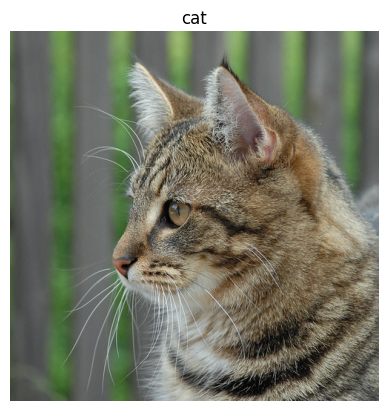

In [51]:
predict(model, 'Fish-vs-Cats/test/cat/527455280_07617e3ffb.jpg', labels=['cat', 'fish'], transforms=transform )